In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
df = pd.read_csv("loans_test.csv")

In [11]:
df.head()

,id,status,sector,posted_date,funded_date,loan_amount,partner_id,bonus_credit_eligibility,lender_count,repayment_term,repayment_interval,num_tags,num_images,video_present,country_code
0,1127,refunded,Transportation,2006-11-05T07:49:12Z,2006-11-05T18:17:29Z,1200,11,False,16,11,Monthly,0,1,False,UG
1,5223,defaulted,Agriculture,2007-03-06T21:31:11Z,2007-03-07T13:23:08Z,225,6,False,4,12,Monthly,0,1,False,KE
2,9319,paid,Food,2007-04-24T07:33:03Z,2007-04-24T22:40:22Z,600,9,True,16,15,Monthly,0,1,False,KH
3,13415,paid,Services,2007-07-03T14:45:26Z,2007-07-03T18:47:44Z,550,20,False,11,10,Monthly,0,1,False,NG
4,17511,paid,Services,2007-09-05T01:45:09Z,2007-09-05T03:46:48Z,1000,22,False,33,16,Monthly,0,1,False,TG


In [12]:
df.shape

(973998, 15)

In [13]:
df_by_partner_id = df.groupby('partner_id')
s_partners = df_by_partner_id.size()
s_partners.sort(ascending=False)
s_partners.head()

C:\Users\Karthik\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort is deprecated, use sort_values(inplace=True) for for INPLACE sorting
  app.launch_new_instance()


partner_id
145    73534
133    26105
71     21087
123    20686
81     20196
dtype: int64

In [14]:
len(s_partners)

408

In [15]:
s_partners[:100].sum()/s_partners.sum()

0.8670603019718727

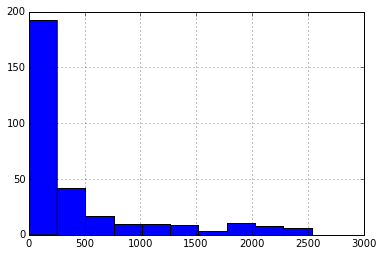

In [16]:
s_partners[100:].hist()

In [17]:
df_by_bonus = df.groupby('bonus_credit_eligibility')
s_bonus = df_by_bonus.size()
s_bonus

bonus_credit_eligibility
False    430948
True     543050
dtype: int64

In [18]:
s_bonus[0].sum()/s_bonus.sum()

0.44245265390688687

C:\Users\Karthik\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0xadc5b38>],
 'caps': [<matplotlib.lines.Line2D at 0xadd3e10>,
 'fliers': [<matplotlib.lines.Line2D at 0xadddb00>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xadd7da0>],
 'whiskers': [<matplotlib.lines.Line2D at 0xadc5ef0>,
  <matplotlib.lines.Line2D at 0xadd3be0>]}

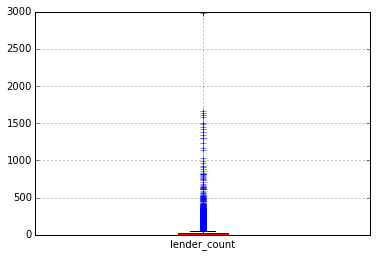

In [19]:
df.boxplot("lender_count")

In [20]:
df_small_lender_count = df[df.lender_count<100]
df_small_lender_count.shape

(951307, 15)

C:\Users\Karthik\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


(0, 60)

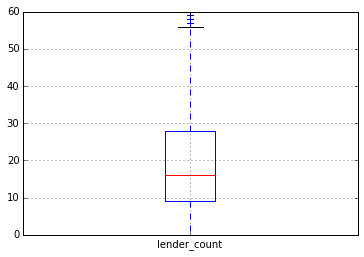

In [40]:
df_small_lender_count.boxplot("lender_count")
plt.ylim(0,60)

In [21]:
df['num_images'].unique()

array([ 1.])

In [22]:
df['video_present'].unique()

array([False, True], dtype=object)

In [26]:
df.groupby('video_present').size()

video_present
False    973455
True        543
dtype: int64

In [27]:
df['status'].unique()

array(['refunded', 'defaulted', 'paid', 'expired', 'inactive_expired',
       'deleted', 'issue', 'inactive', 'in_repayment', 'reviewed', nan,
       'funded'], dtype=object)

In [28]:
df.groupby('status').size()

status
defaulted            21245
deleted               2843
expired              32027
funded                  62
in_repayment        150118
inactive              2445
inactive_expired     12585
issue                  247
paid                746921
refunded              5492
reviewed                12
dtype: int64